# L03 13/03/24

We'll use tensorflow, first assignment is going to be explained today

## ANN (Artificial Neural Network)

A mathematical model able to approximate with high precision a generic multi-dimensional function:  
$$ f:R^{n} \to R^m : y = f(x) \to ANN(x) = \^{y} $$

Problems that it solves:
- Regression, model the relationship between variables
- Classification, recognize and categorize the inputs

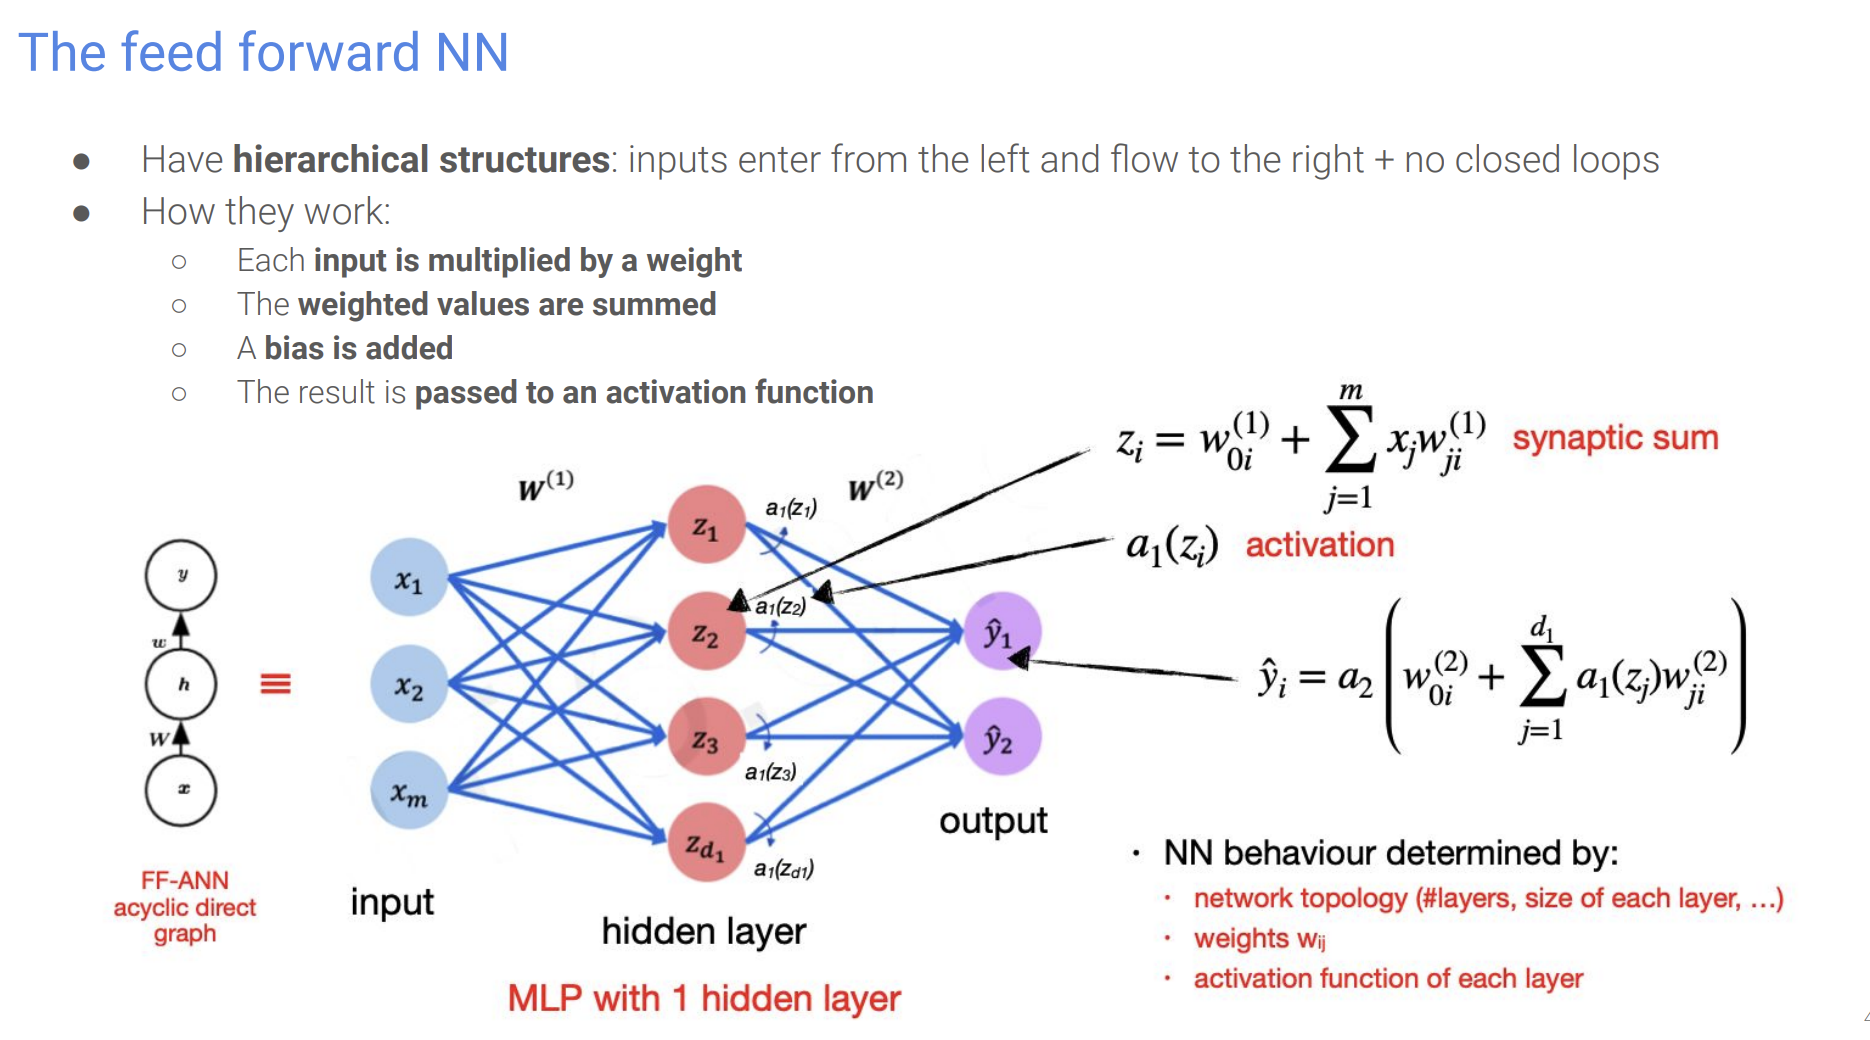

$w_{0i}^{(1)}$ it's the bias

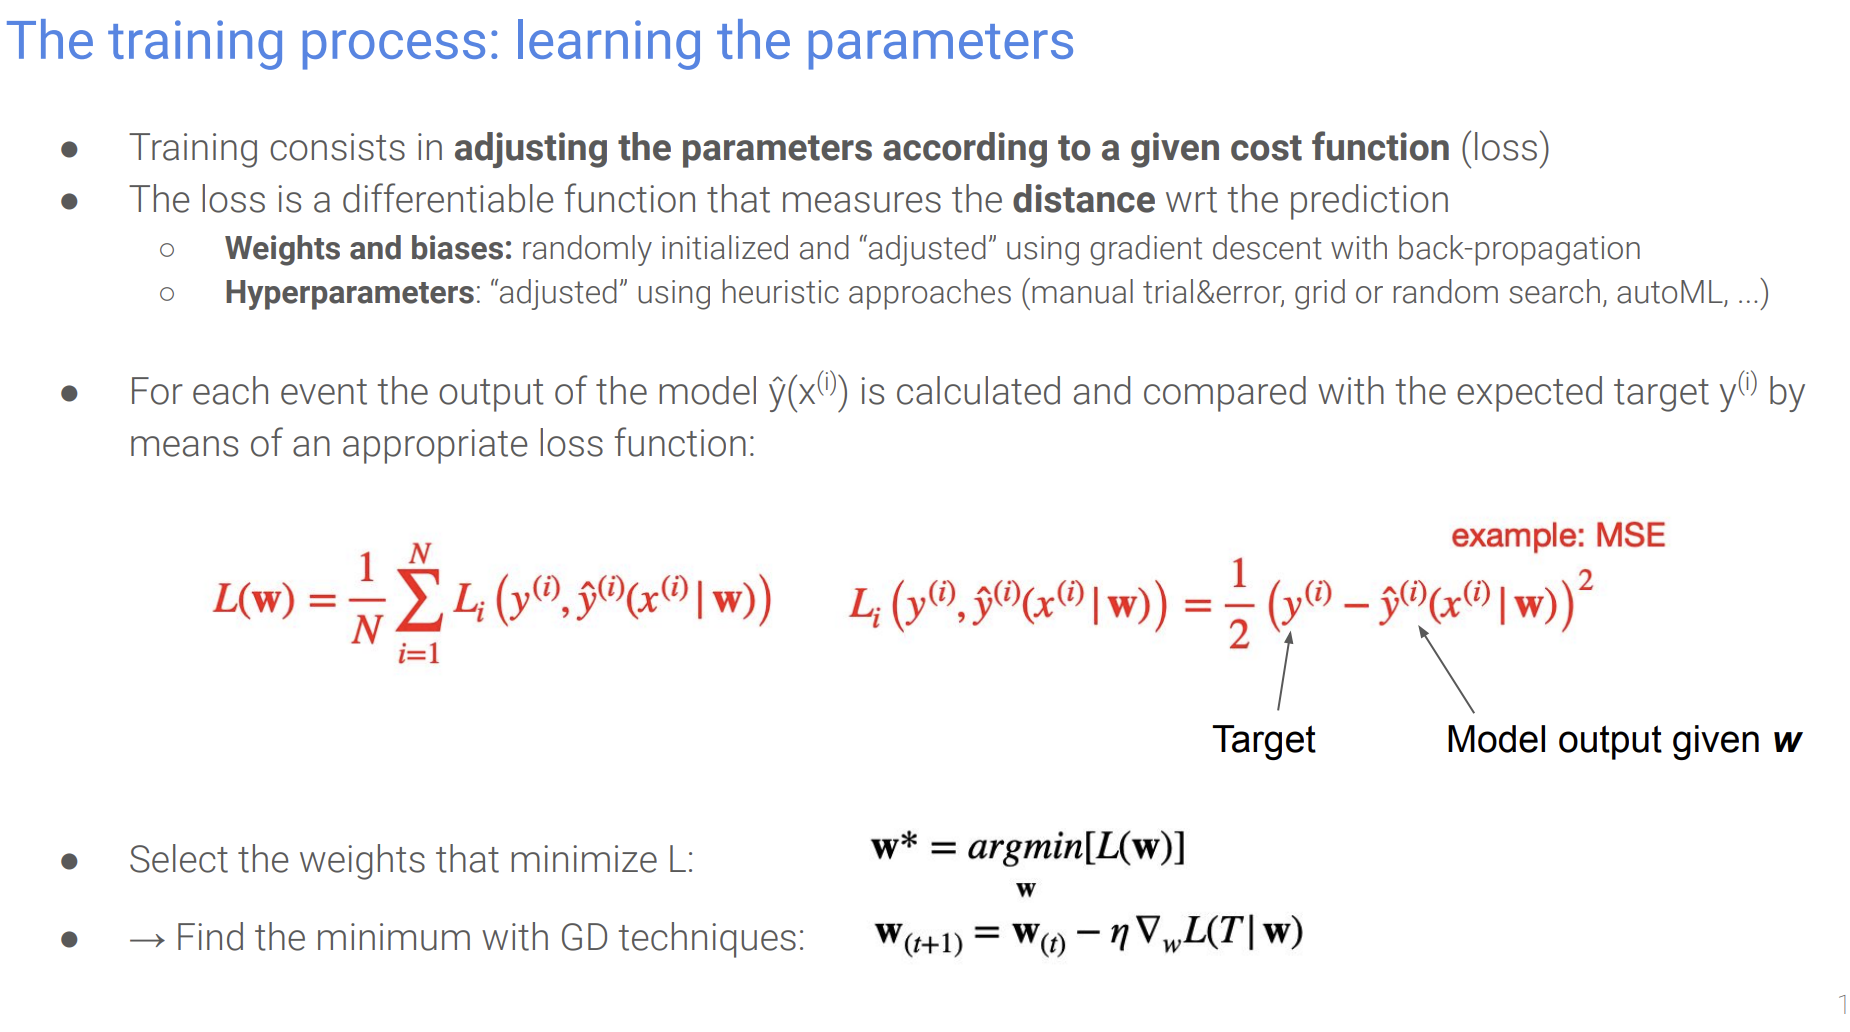

Reminder of what a vanishing gradient is: the first layeers are harder to train in comparison to the last ones, because backpropagation starts from the last layer and goes backwards.

Dropout is really useful to avoid overfitting, during training you randomly shut down some nodes, in order to make the network learn not to rely on a set of features too much

[]

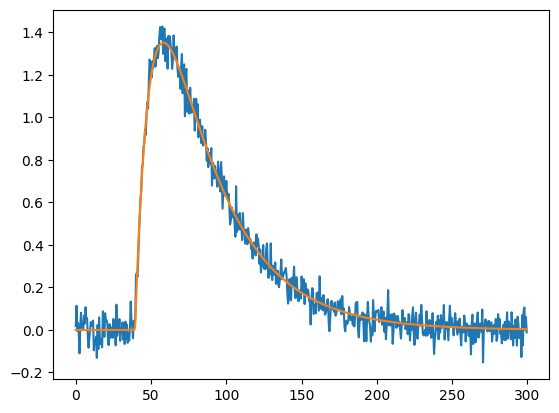

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import initializers
from keras.utils import to_categorical
from tensorflow import Variable
from tensorflow.keras.metrics import MeanSquaredError


noisy_data = []

noisy_data = np.load('./data/signal_waves_noisy.npy')
clean_data = np.load('./data/signal_waves.npy')

plt.plot(noisy_data[0][0], noisy_data[0][1])
plt.plot(clean_data[0][0], clean_data[0][1])
plt.plot()

In [3]:
noisy_data[0][1]

array([ 1.82291780e-02,  1.13803871e-01, -4.53096264e-03,  3.37556456e-02,
       -2.17800486e-02, -1.10151568e-01,  1.83208736e-02,  8.06056908e-02,
        1.26561512e-02,  8.69134408e-03,  8.47512128e-03,  6.70665804e-02,
        3.01390191e-02,  1.06663941e-01,  5.39591556e-02,  5.42445997e-02,
       -2.95966447e-02, -8.34941117e-02, -3.69946222e-02,  7.82012759e-04,
        3.69956360e-02,  1.82823972e-02,  3.25983359e-02,  4.41570085e-02,
       -9.57488477e-02, -4.72212838e-02, -5.78761650e-02, -3.22527432e-02,
       -1.31241765e-01,  2.34552762e-02, -9.04051866e-02,  5.91528228e-02,
       -4.02854708e-02, -6.65198701e-02, -4.52447400e-02, -8.18640045e-02,
        8.73441987e-02,  3.17135219e-02, -3.22220356e-02,  7.88537827e-02,
        4.49662249e-02,  4.52793049e-02,  2.85568880e-02, -6.78905884e-02,
       -7.13125610e-02,  2.68702500e-02, -3.67267562e-02,  1.07820639e-02,
        1.26414870e-02, -3.65423701e-02,  5.17562951e-02, -1.55459007e-02,
        2.04952844e-02, -

In [9]:
model = Sequential() # feed forward neural network
model.add(Input(shape=(600,))) # input nodes with shape (8,)
model.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros')) # hidden layer 1, kernel initializer tells us what is the initial starting point (initial random weights in this case)
#model.add(Dropout(0.5)) # 50% of the connections will be dropped during training at random
model.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros')) # hidden layer 2
#model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros')) # hidden layer 2
#model.add(Dropout(0.5))
model.add(Dense(600, activation='linear', kernel_initializer='random_normal', bias_initializer='zeros')) # output layer, just 1 neuron, because it responds with yes/no


opt = keras.optimizers.Adam(learning_rate=0.01)  #Adam optimizer, with the learning rate chosen
model.compile(optimizer='adam', # algorithm used during minimization, optimized gradient descent seen in other courses
              loss='mean_squared_error') # target is to go as close as possible to the right answer

_, y_val_noisy = noisy_data[:,0], noisy_data[:,1] # we don't need the x! just y!
_, y_val_clean = clean_data[:,0], clean_data[:,1]

In [5]:
clean_data.shape

(200000, 2, 600)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         6,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 600)            │         6,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,725 (49.71 KB)

 Trainable params: 12,725 (49.71 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
X_val = noisy_data[:,1][:-100]
y_val = clean_data[:,1][:-100]

class PredictionCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    y_pred = self.model.predict(self.validation_data[0])
    plt.clf()
    plt.plot(self.validation_data[0][0], y_pred[0])
    plt.show()

In [15]:
history = model.fit(y_val_noisy[:-100], y_val_clean[:-100], epochs=10, batch_size=500, validation_split=0.2, callbacks=[PredictionCallback()], validation_data=(X_val, y_val)) # does the validation split in place

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5990e-05

TypeError: 'NoneType' object is not subscriptable

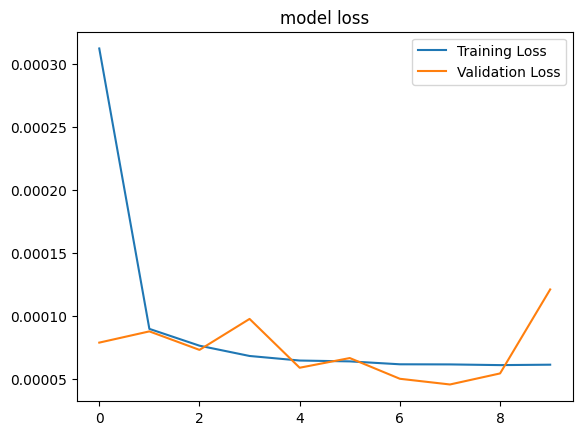

In [42]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('model loss')
plt.legend()
plt.show()

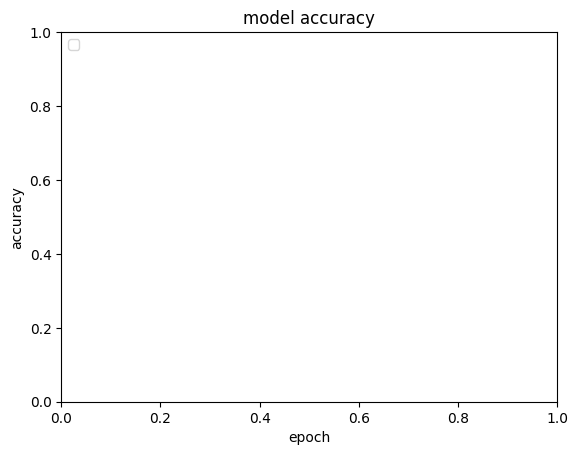

In [59]:
#plt.plot(history.history['mse'], label="Training accuracy")
#plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
predicted = model.predict(y_val_noisy)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 435us/step


In [30]:
predicted

array([[ 4.8020716e-05,  4.0164012e-03,  4.6302946e-03, ...,
         6.9442559e-03,  6.8725804e-03,  6.8012243e-03],
       [ 2.0942032e-05,  2.2208944e-04,  1.8789301e-04, ...,
         3.4770013e-03,  3.4473478e-03,  3.4180023e-03],
       [ 5.0894450e-05,  1.3054026e-03,  1.4601883e-03, ...,
         1.1117064e-02,  1.1002987e-02,  1.0889735e-02],
       ...,
       [ 1.4790110e-05, -2.1941420e-03, -6.6452328e-04, ...,
         4.4855247e-03,  4.4530611e-03,  4.4213692e-03],
       [ 9.7278626e-06, -1.5614567e-03, -8.8915828e-04, ...,
         1.7613607e-03,  1.7538957e-03,  1.7467812e-03],
       [ 1.3220299e-05, -1.5361712e-03, -3.7078172e-04, ...,
         3.3104578e-03,  3.2893312e-03,  3.2688051e-03]], dtype=float32)

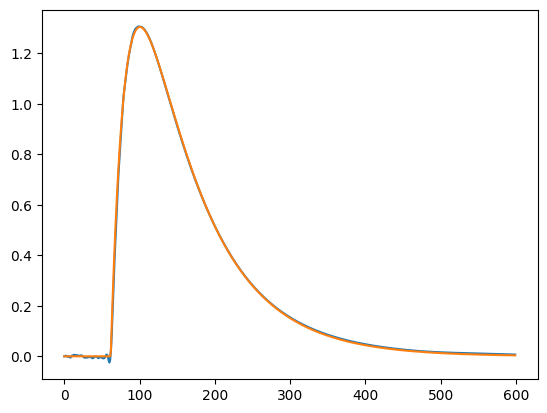

In [63]:
num = 19990
x = np.arange(0, 600, 0.5)
plt.plot(predicted[num])
plt.plot(y_val_clean[num])
#plt.plot(y_val_noisy[num])